In [ ]:
Nguyễn Thái Bình - 19146050 - Nhóm 02CLC - 10_Food

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [21]:
trainset='/content/drive/MyDrive/10_Food_data/train'
validationset='/content/drive/MyDrive/10_Food_data/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [22]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 127 images belonging to 10 classes.
Found 79 images belonging to 10 classes.


In [23]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'banh_mi': 0, 'banh_xeo': 1, 'bun_dau': 2, 'che': 3, 'coffee': 4, 'com_tam': 5, 'goi_cuon': 6, 'hot_vit_lon': 7, 'pho': 8, 'xoi': 9}
{'banh_mi': 0, 'banh_xeo': 1, 'bun_dau': 2, 'che': 3, 'coffee': 4, 'com_tam': 5, 'goi_cuon': 6, 'hot_vit_lon': 7, 'pho': 8, 'xoi': 9}


In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [25]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=5,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
13/13 [==============================] - 78s 6s/step - loss: 2.8789 - accuracy: 0.0709 - val_loss: 2.2753 - val_accuracy: 0.1772
Epoch 2/30
13/13 [==============================] - 17s 1s/step - loss: 2.2494 - accuracy: 0.1890 - val_loss: 2.1677 - val_accuracy: 0.4304
Epoch 3/30
13/13 [==============================] - 17s 1s/step - loss: 2.1580 - accuracy: 0.2913 - val_loss: 1.8804 - val_accuracy: 0.5316
Epoch 4/30
13/13 [==============================] - 17s 1s/step - loss: 1.5704 - accuracy: 0.5512 - val_loss: 1.6865 - val_accuracy: 0.5443
Epoch 5/30
13/13 [==============================] - 18s 1s/step - loss: 0.9625 - accuracy: 0.6772 - val_loss: 2.1582 - val_accuracy: 0.3797
Epoch 6/30
13/13 [==============================] - 17s 1s/step - loss: 0.4220 - accuracy: 0.8976 - val_loss: 1.3367 - val_accuracy: 0.6203
Epoch 7/30
13/13 [==============================] - 18s 1s/step - loss: 0.1903 - accuracy: 0.9528 - val_loss: 1.3016 - val_accuracy: 0.6582
Epoch 8/30
13/13 [==

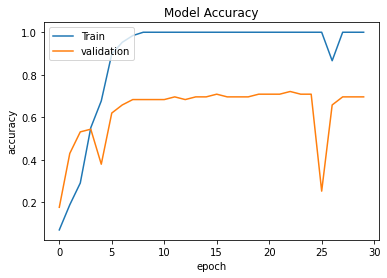

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [31]:
model.save('/content/drive/MyDrive/BT AI/10_Food.h5')

In [32]:
load_model('/content/drive/MyDrive/BT AI/10_Food.h5')

Found 10 images belonging to 1 classes.


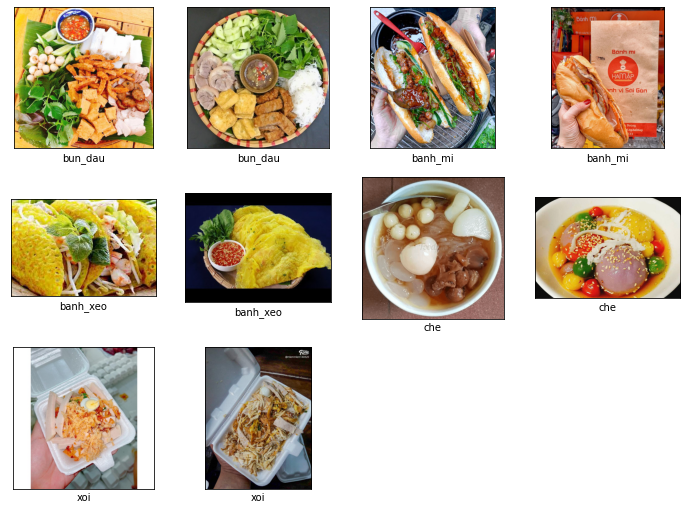

In [35]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/Test food',batch_size=5,shuffle=False,interpolation='lanczos')

food={0:'banh_mi', 
       1:'banh_xeo', 
       2:'bun_dau', 
       3:'che', 
       4:'coffee', 
       5:'com_tam', 
       6:'goi_cuon', 
       7:'hot_vit_lon', 
       8:'pho', 
       9:'xoi'}
plt.figure(figsize=(12,12))
for i in range(len(generator_data.filenames)):
    plt.subplot(4,4,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/Test food/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(food[np.argmax(model.predict(img))]) 
plt.show()